In [1]:
# !pip install tensorflow==2.1.0

In [2]:
import tensorflow as tf 
print(tf.__version__)

2.1.0


In [3]:
# !pip install -q tensorflow-datasets 

In [4]:
import tensorflow_datasets as tfds 
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.2)
config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)
session = tf.compat.v1.Session(config=config)

imdb,info=tfds.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True) 

In [5]:
train_data1,test_data1=imdb['train'],imdb['test'] 

In [6]:
tokenizer=info.features['text'].encoder 
 

In [7]:
sample_string='TensorFlow, from basic to mastery'
tokenized_string =tokenizer.encode(sample_string) 
print('Tokenized string is {}'.format(tokenized_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 2715, 7, 2652, 8050]


In [8]:
original_string=tokenizer.decode(tokenized_string) 
print('The original string : {}'.format(original_string))

The original string : TensorFlow, from basic to mastery


In [9]:
for ts in tokenized_string:
    print('{} ----->{}'.format(ts,tokenizer.decode([ts])))

6307 ----->Ten
2327 ----->sor
4043 ----->Fl
2120 ----->ow
2 ----->, 
48 ----->from 
2715 ----->basic 
7 ----->to 
2652 ----->master
8050 ----->y


In [10]:
tokenizer.vocab_size

8185

In [11]:
embedding_dim = 64
max_length=120

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(128,5,activation='relu'), 
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [13]:
tokenizer.vocab_size*embedding_dim

523840

In [14]:
num_epochs = 50

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# train_data = train_data1.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)),num_parallel_calls=16)
# train_data = train_data1.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))
# test_data = test_data1.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)),num_parallel_calls=16)
# test_data = test_data1.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data1 = train_data1.shuffle(BUFFER_SIZE)
train_data = train_data1.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data1))
test_data= test_data1.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data1))



history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

Epoch 1/50
391/391 [==============================] - 27s 69ms/step - loss: 0.4676 - accuracy: 0.7645 - val_loss: 0.3164 - val_accuracy: 0.8774
Epoch 2/50
391/391 [==============================] - 15s 37ms/step - loss: 0.2321 - accuracy: 0.9146 - val_loss: 0.3036 - val_accuracy: 0.8796
Epoch 3/50
391/391 [==============================] - 13s 34ms/step - loss: 0.1737 - accuracy: 0.9368 - val_loss: 0.3338 - val_accuracy: 0.8729
Epoch 4/50
391/391 [==============================] - 13s 34ms/step - loss: 0.1400 - accuracy: 0.9511 - val_loss: 0.3846 - val_accuracy: 0.8696
Epoch 5/50
391/391 [==============================] - 12s 32ms/step - loss: 0.1119 - accuracy: 0.9612 - val_loss: 0.4250 - val_accuracy: 0.8672
Epoch 6/50
391/391 [==============================] - 12s 32ms/step - loss: 0.0910 - accuracy: 0.9692 - val_loss: 0.4923 - val_accuracy: 0.8612
Epoch 7/50
391/391 [==============================] - 12s 31ms/step - loss: 0.0714 - accuracy: 0.9768 - val_loss: 0.5668 - val_accuracy:

In [15]:
import matplotlib.pyplot as plt 
def plot_graphs(history,string):
    plt.plot(history.history[string]) 
    plt.plot(history.history['val_'+string]) 
    plt.xlabel('Epochs') 
    plt.ylabel(string) 
    plt.legend([string,'val_'+string]) 
    plt.show() 

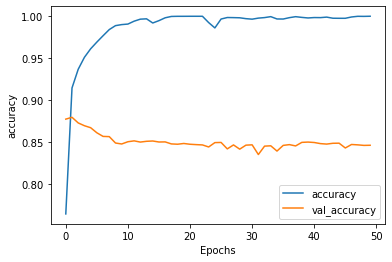

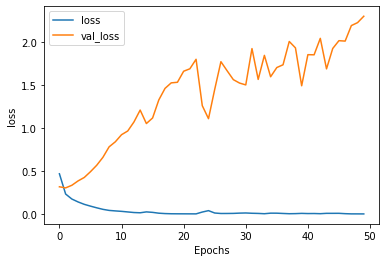

In [16]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
train_data

<PaddedBatchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>

In [18]:
for a in train_data:
    print(a) 
    break 

(<tf.Tensor: shape=(64, 1301), dtype=int64, numpy=
array([[  19,   27,   18, ...,    0,    0,    0],
       [6000,  105,  579, ...,    0,    0,    0],
       [ 518,  218,   14, ...,    0,    0,    0],
       ...,
       [2812,  686, 5118, ...,    0,    0,    0],
       [  12,  284,   14, ...,    0,    0,    0],
       [ 324,  218,  150, ...,    0,    0,    0]])>, <tf.Tensor: shape=(64,), dtype=int64, numpy=
array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0])>)
